<p style="text-align: center;">МІНІСТЕРСТВО ОСВІТИ І НАУКИ УКРАЇНИ</p>
<p style="text-align: center;">НАЦІОНАЛЬНИЙ ТЕХНІЧНИЙ УНІВЕРСИТЕТ</p>
<p style="text-align: center;">«ХАРКІВСЬКИЙ ПОЛІТЕХНІЧНИЙ ІНСТИТУТ»</p>
<br>
<p style="text-align: center;">КАФЕДРА «ПРОГРАМНА ІНЖЕНЕРІЯ ТА</p>
<p style="text-align: center;">ІНТЕЛЕКТУАЛЬНІ ТЕХНОЛОГІЇ УПРАВЛІННЯ»</p>
<br>
<br>
<br>
<p style="text-align: center;">ЗВІТ</p>
<p style="text-align: center;">з лабораторної роботи № 5</p>
<p style="text-align: center;">з навчальної дисципліни</p>
<p style="text-align: center;">«Обробка даних Python»</p>
<br>
<br>
<br>
<br>
<p style="text-align: right;">ВИКОНАВ</p>
<p style="text-align: right;">Студент групи КН-222с</p>
<p style="text-align: right;">Дмитро СІГОВ</p>
<br>
<p style="text-align: right;">ПЕРЕВІРИВ</p>
<br>
<p style="text-align: right;">Герман ЗВЄРЦЕВ</p>
<br>
<br>
<br>
<br>
<p style="text-align: center;">Харків 2023</p>


<p style="text-align: center;">Робота з бібліотекою OpenCV<p>

<p style="text-align: center;">Хід роботи</p>
<a href="https://github.com/SihovDmytro/python-lab5/blob/master/lab5.ipynb">Посилання на github</a><br>
Завдання:<br>
1. Визначити номер варіанта за формулою:<br>
N = ord(X) % 5 + 1,<br>
де X – перша велика літера вашого імені в латинській транскрипції.<br>
Наприклад, для James Bond номер варіанта буде N = 5<br>

2. Завантажити дані з файлу kr1.xlsx до датафрейму.<br>
3. Отримати дані до свого варіанту програмно з датафрейму,<br>
використовуючи інструменти індексування.<br>
4. Створити функцію, що приймає в якості аргументів дані з датафрейму та<br>
повертає зменшене зображення з доданими «круглими окулярами» та<br>
зберігає отримане зображення у файл.<br>

In [2]:
ord('D') % 5 + 1

4

In [10]:
import pandas as pd

df = pd.read_excel('Lab5/lab6.xlsx', sheet_name='Лист1')
# df
df[df['N'] == (ord('D') % 5 + 1)]

,N,file name,image size,glasses color,line width
3,4,longbottom.jpg,600x600,magenta,5


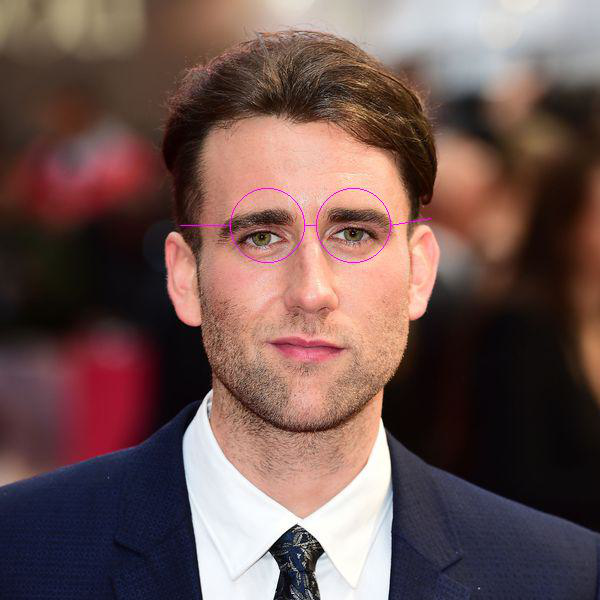

In [49]:
import cv2
from PIL import Image, ImageDraw
import numpy as np

def add_glasses(image_path, output_path):

    img = cv2.imread(image_path)
    
    face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
    
    pil_img = Image.open(image_path)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)

        eye_radius = int(0.13 * h)
        eye_center1 = (x + int(0.35 * w), y + int(0.35 * h))
        eye_center2 = (x + int(0.65 * w), y + int(0.35 * h))

        draw = ImageDraw.Draw(pil_img)

        leftline = [(eye_center1[0]-eye_radius, eye_center1[1]), (eye_center1[0]-eye_radius-50, eye_center1[1])]
        draw.line(leftline, fill ="magenta", width = 1)
        rightline = [(eye_center2[0]+eye_radius, eye_center2[1]), (eye_center2[0]+eye_radius+40, eye_center2[1]-7)]
        draw.line(rightline, fill ="magenta", width = 1)
        middleline = [(eye_center1[0]+eye_radius, eye_center1[1]), (eye_center2[0]-eye_radius, eye_center2[1])]
        draw.line(middleline, fill ="magenta", width = 1) 
        draw.ellipse([eye_center1[0]-eye_radius, eye_center1[1]-eye_radius,
                      eye_center1[0]+eye_radius, eye_center1[1]+eye_radius], outline ="magenta")
        draw.ellipse([eye_center2[0]-eye_radius, eye_center2[1]-eye_radius,
                      eye_center2[0]+eye_radius, eye_center2[1]+eye_radius], outline ="magenta")

    pil_img = pil_img.crop((0,0,600,600))
    pil_img.save(output_path)


add_glasses("C:/Users/User/python/lab5/Lab5/Images/longbottom.jpg", "longbottom.jpg")
Image.open("C:/Users/User/python/lab5/longbottom.jpg")